1、数据整理查看

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#读取数据
pokemon = pd.read_csv("Pokemon.csv")
pokemon.shape#查看数据集维度

(800, 13)

In [3]:
#查看数据集类型，数据较完整只有Type2大约一半是空置，有三个对象类型，一个布尔值类型，九个整型，三个对象类型
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
#打印出前头部
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
#数量、平均值、标准差、最小值、四分位数（数据分布）、最大值
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
#每代宠物小精灵的数量
pokemon.Generation.value_counts().sort_index()

1    166
2    106
3    160
4    121
5    165
6     82
Name: Generation, dtype: int64

In [7]:
# 不同代次小精灵能力的平均值
stats = pokemon[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].groupby(pokemon['Generation'],as_index=True).mean().round(2)
stats

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Generation,,,,,,
1,65.82,76.64,70.86,71.82,69.09,72.58
2,71.21,72.03,73.39,65.94,73.91,61.81
3,66.54,81.62,74.10,75.81,71.22,66.92
4,73.08,82.87,78.13,76.40,77.19,71.34
5,71.79,82.07,72.33,71.99,68.74,68.08
6,68.27,75.80,76.68,74.29,74.89,66.44


2、数据可视化

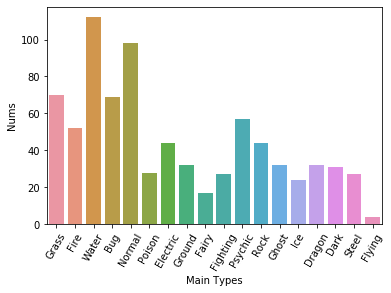

In [8]:
sns.countplot(x = "Type 1",data= pokemon)#列出各个主属性的直方图
plt.title = ('count of main types')
plt.xlabel("Main Types")
plt.ylabel("Nums")
plt.xticks(rotation = 60)
plt.show()
#主属性为：water、Normal、Grass、Grass、Bug的小精灵数量最多

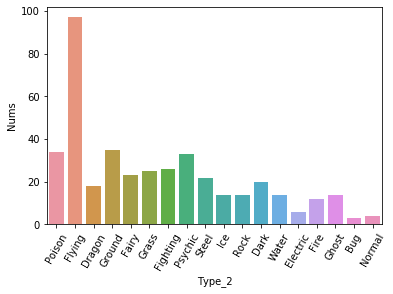

In [9]:
sns.countplot(x="Type 2",data=pokemon)#列出各个副属性的条形图
plt.title = ("count of assistans types")
plt.xlabel("Type_2")
plt.ylabel("Nums")
plt.xticks(rotation = 60)
plt.show()
#副属性为fly的小精灵数量远远大于其他的小精灵

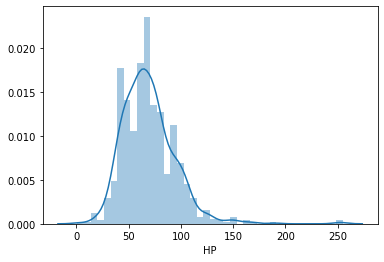

In [10]:
#HP的分布图，大部分精灵的血量在50~100之间
sns.distplot(pokemon['HP'])

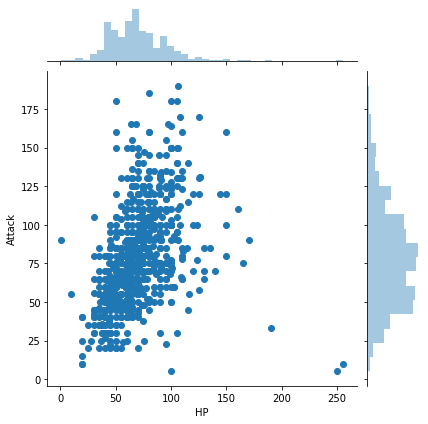

In [11]:
#HP和Attack的散点图，可以看出他们之间存在一定的相关性
sns.jointplot(x="HP",y="Attack",data=pokemon)

D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


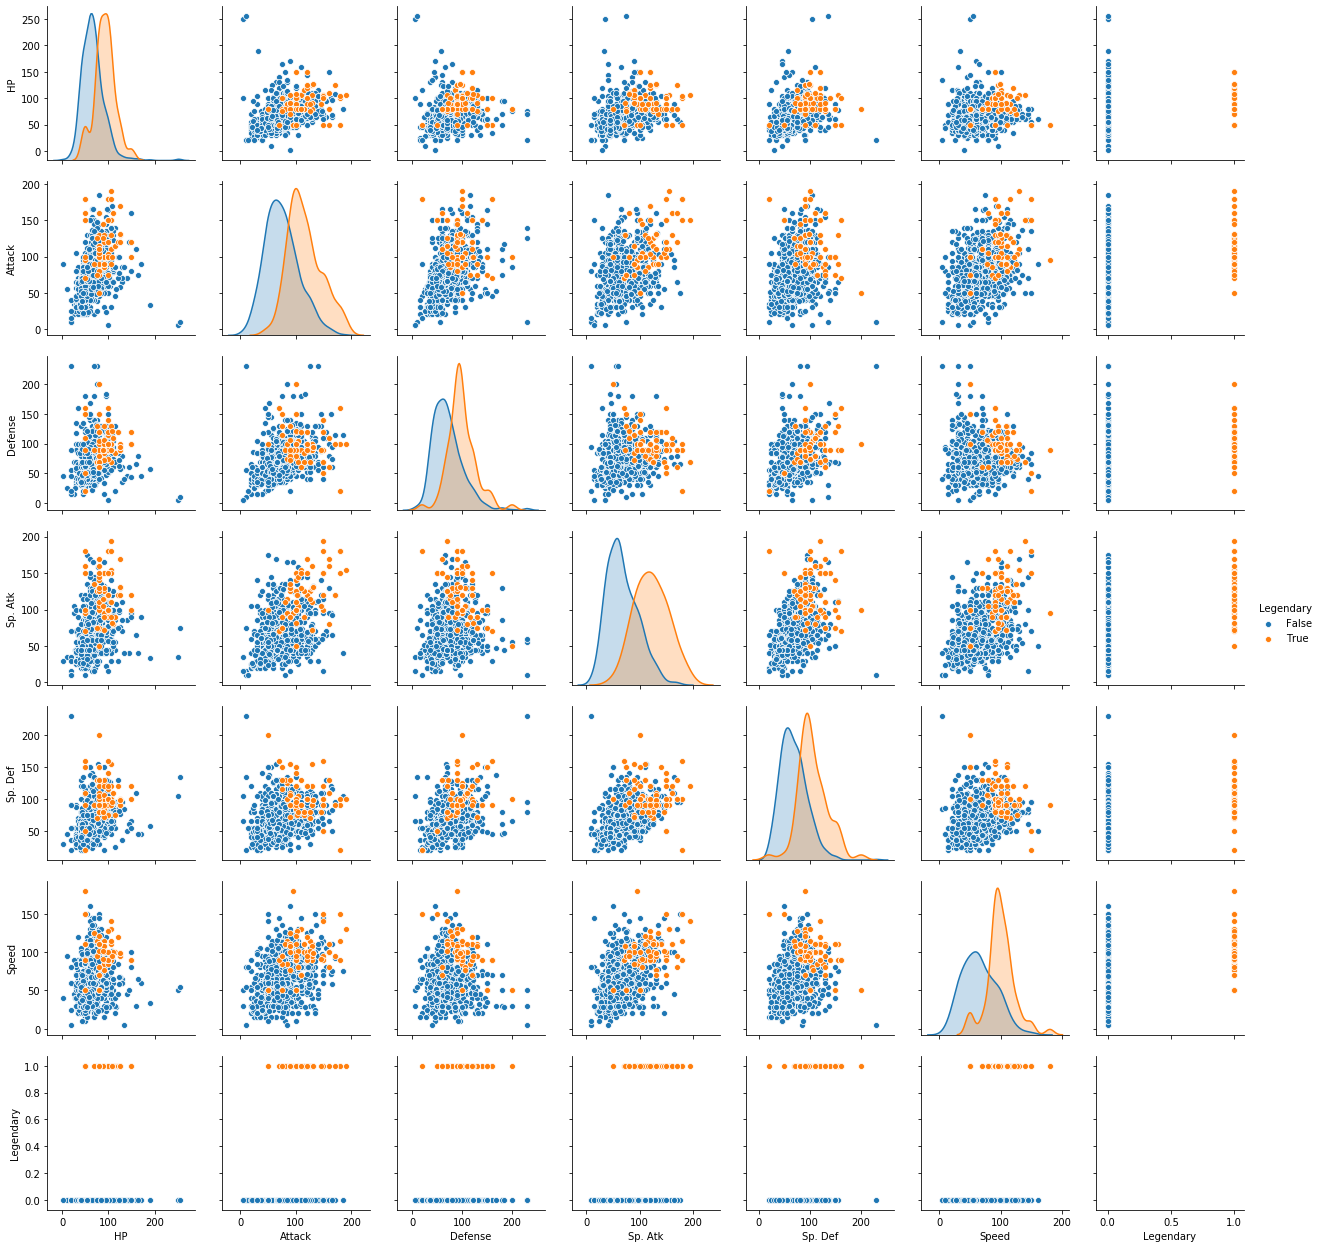

In [12]:
#按神兽进行区分
sns.pairplot(pokemon.iloc[:,[5,6,7,8,9,10,12]],hue='Legendary')
plt.show()

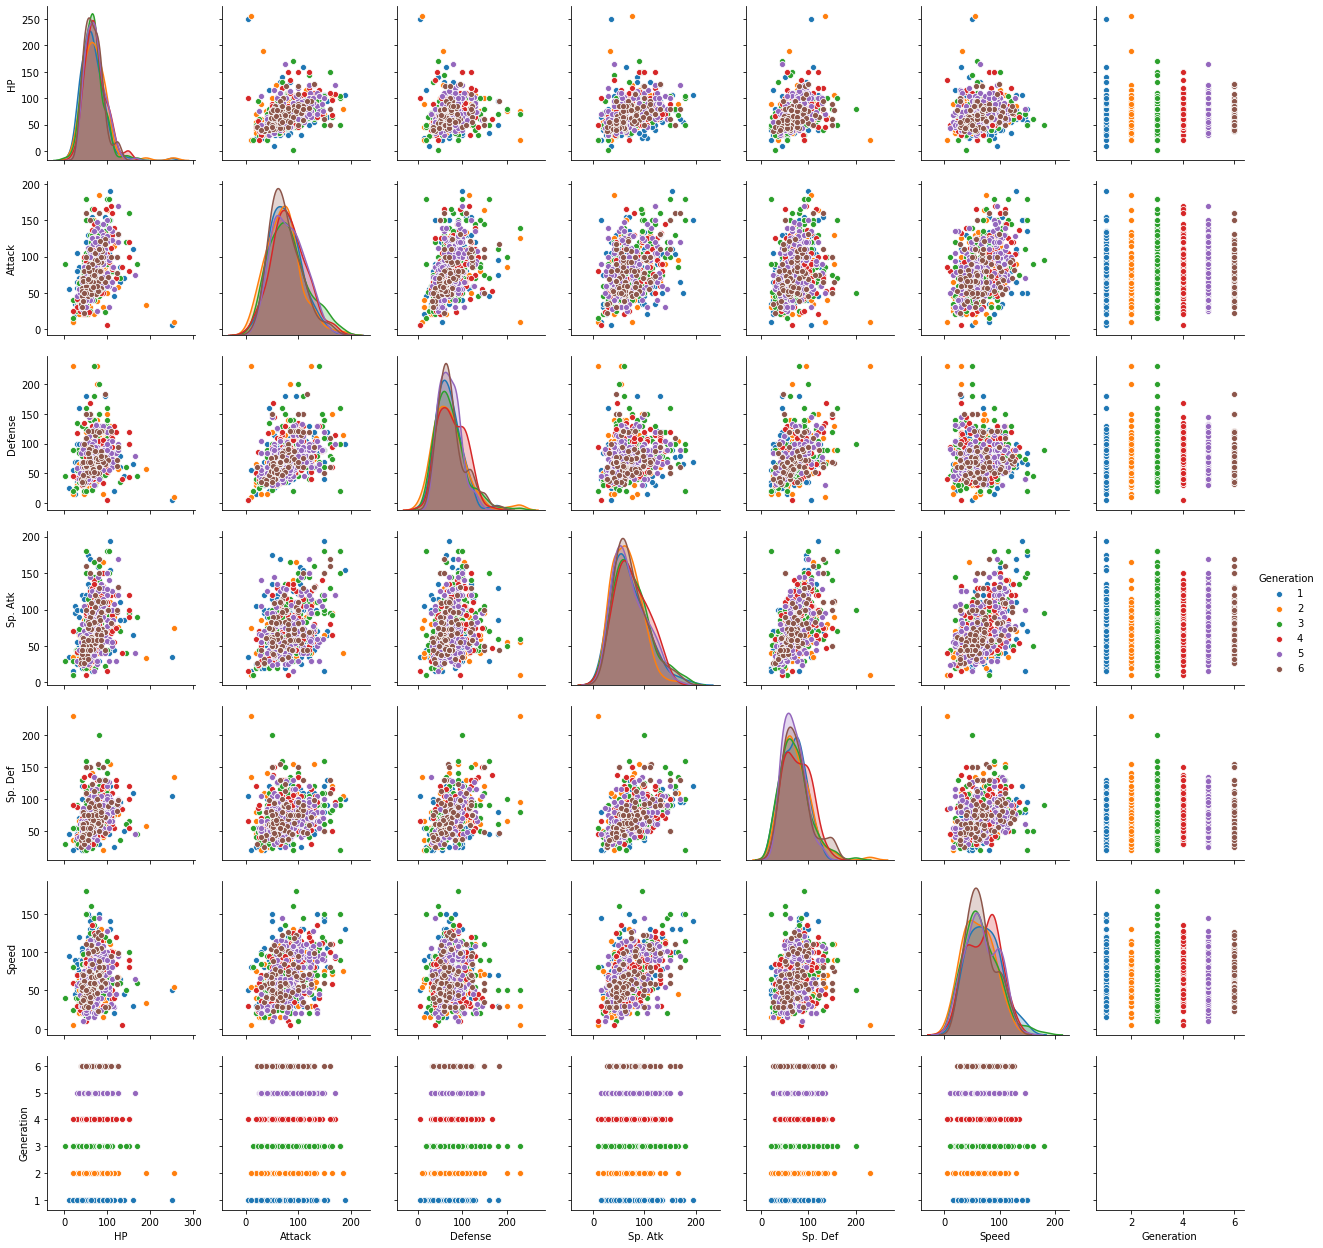

In [13]:
#按世代进行区分
sns.pairplot(pokemon.iloc[:,5:-1],hue='Generation')
plt.show()

3、特征分析

In [14]:
Legendary_Yes = pokemon[pokemon['Legendary']==True]
Legendary_No = pokemon[pokemon['Legendary']==False]
corr_Yes = Legendary_Yes[['Total','Attack','Defense','Sp. Atk','Sp. Def','Speed']].corr()#corr计算相关系数
corr_No = Legendary_No[['Total','Attack','Defense','Sp. Atk','Sp. Def','Speed']].corr()
#将数据集分为神兽与非神兽，查看数值变量之间的关联性

In [15]:
corr_Yes

,Total,Attack,Defense,Sp. Atk,Sp. Def,Speed
Total,1.000000,0.668782,0.105290,0.610607,0.194525,0.142228
Attack,0.668782,1.000000,-0.210974,0.567287,-0.391433,0.269200
Defense,0.105290,-0.210974,1.000000,-0.510352,0.377674,-0.527786
Sp. Atk,0.610607,0.567287,-0.510352,1.000000,-0.154694,0.310406
Sp. Def,0.194525,-0.391433,0.377674,-0.154694,1.000000,-0.493259
Speed,0.142228,0.269200,-0.527786,0.310406,-0.493259,1.000000


In [16]:
corr_No

,Total,Attack,Defense,Sp. Atk,Sp. Def,Speed
Total,1.000000,0.699817,0.608721,0.685697,0.698582,0.520161
Attack,0.699817,1.000000,0.437192,0.261879,0.211872,0.305346
Defense,0.608721,0.437192,1.000000,0.186030,0.475241,-0.040796
Sp. Atk,0.685697,0.261879,0.186030,1.000000,0.471164,0.393205
Sp. Def,0.698582,0.211872,0.475241,0.471164,1.000000,0.212542
Speed,0.520161,0.305346,-0.040796,0.393205,0.212542,1.000000


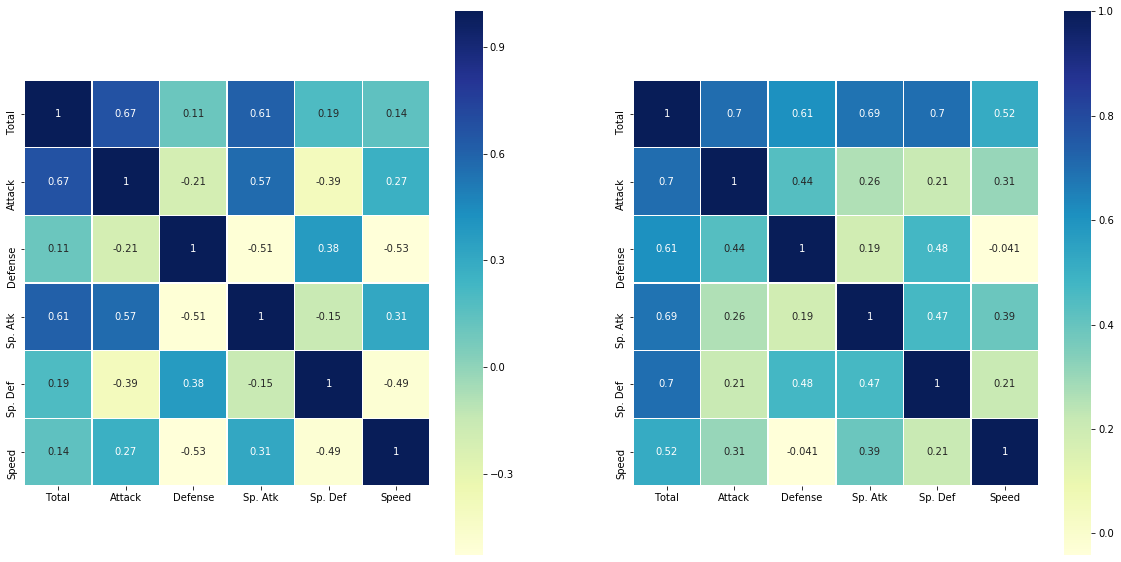

In [17]:
#神兽与非神兽各项特征之间的关联性
plt.figure(1,figsize=(20,10))
plt.subplot(1,2,1)
sns.heatmap(corr_Yes,linewidths=.5,cmap="YlGnBu",square=True,annot=True)
plt.subplot(1,2,2)
sns.heatmap(corr_No,linewidths=.5,cmap="YlGnBu",square=True,annot=True)
plt.show()

4、精灵分类预测与分析

In [18]:
#将小精灵HP、Attack、Defence等属性单独分割为data数据集，数据预处理
data = pokemon.loc[:,['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation']]
Legendary = pokemon.Legendary
data

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,45,49,49,65,65,45,1
1,60,62,63,80,80,60,1
2,80,82,83,100,100,80,1
3,80,100,123,122,120,80,1
4,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,6
796,50,160,110,160,110,110,6
797,80,110,60,150,130,70,6
798,80,160,60,170,130,80,6


In [20]:
#使用决策树分类器，通过各个属性来判断小精灵是否是神兽
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, Legendary, stratify=Legendary, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.920


In [25]:
tree.predict(X_test)

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [21]:
#设置数的最大深度为3
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.945
Accuracy on test set: 0.920


In [22]:
#可以看出Defense和Generation对判断是否为神兽不起作用
print("data中各个属性的重要性:")
print(tree.feature_importances_)

data中各个属性的重要性:
[0.19131277 0.01906352 0.         0.62761592 0.09392377 0.06808402
 0.        ]


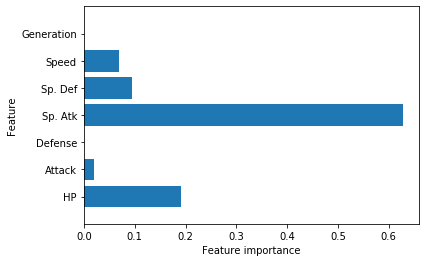

In [23]:
#特征重要性可视化
def plot_feature_importances_data(model):
    n_features = data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_data(tree)